# Tarea 2 - Regresion Polinomial & Feature engineering

## Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 6 de Junio. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt

#habilitamos compatibilidad para TensorFlow v1
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()


### Carga y Transformación del Dataset
Cargamos el dataset y filtramos los casos confirmados en Guatemala.

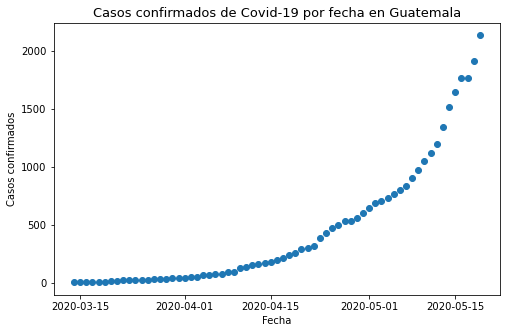

In [3]:
#carga de dataset
covid19_data = pd.read_csv('covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)

GT_confirmed = covid19_data[(covid19_data["Country/Region"] == 'Guatemala') & (covid19_data["Confirmed"] > 0)].copy()

plt.figure(figsize=(8,5))
plt.scatter(x = GT_confirmed["Date"], y= GT_confirmed["Confirmed"])
plt.title("Casos confirmados de Covid-19 por fecha en Guatemala", FontSize=13)
plt.xlabel("Fecha")
plt.ylabel("Casos confirmados")
plt.show()


En la gráfica se puede observar que los casos confirmados han incrementado de manera exponencial a lo largo del tiempo. 

Se procederá a aplicar logaritmo natural con el fin de realizar una transformación sobre los datos que nos permitan obtener una relación lineal entre la fecha y casos confirmados, agregando este nuevo valor transformado al dataset.

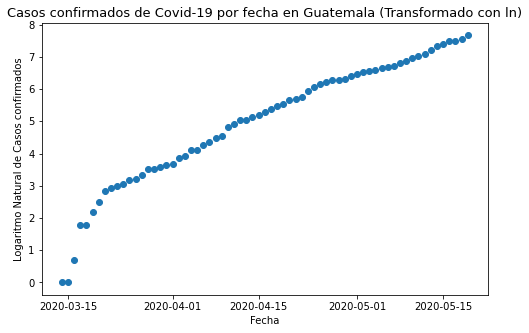

In [4]:
GT_confirmed["ln(Confirmed)"] = np.log(GT_confirmed["Confirmed"])

plt.figure(figsize=(8,5))
plt.scatter(x = GT_confirmed["Date"], y= GT_confirmed["ln(Confirmed)"])
plt.title("Casos confirmados de Covid-19 por fecha en Guatemala (Transformado con ln)", FontSize=13)
plt.xlabel("Fecha")
plt.ylabel("Logaritmo Natural de Casos confirmados")
plt.show()

En la gráfica se puede apreciar que a partir de los casos confirmados transformados con valor 3, se tiene una tendencia lineal, por lo que se verifica en que fecha se inicia el incremento lineal y se desechan los datos previos a esa fecha.

In [5]:
GT_confirmed.head(15)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(Confirmed)
13903,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0,0.000000
14168,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0,0.000000
14433,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0,0.693147
14698,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0,1.791759
14963,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0,1.791759
15228,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0,2.197225
15493,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0,2.484907
15758,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0,2.833213
16023,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439
16288,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732


Se tomarán los casos confirmados a partir del 22 de marzo de 2020 para el modelo lineal.

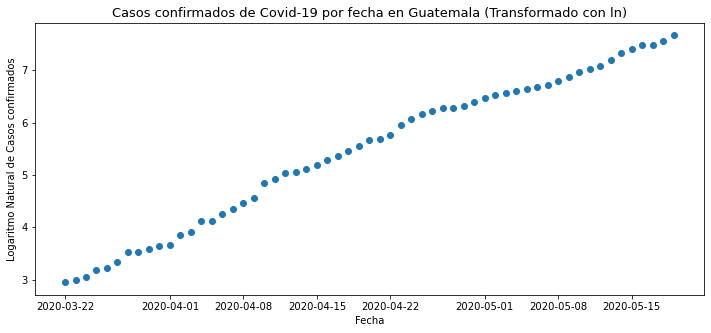

In [6]:
GT_confirmed_post22 = GT_confirmed[GT_confirmed.Date >= '2020-03-22'].copy()

plt.figure(figsize=(12,5))
plt.scatter(x = GT_confirmed_post22["Date"], y= GT_confirmed_post22["ln(Confirmed)"])
plt.title("Casos confirmados de Covid-19 por fecha en Guatemala (Transformado con ln)", FontSize=13)
plt.xlabel("Fecha")
plt.ylabel("Logaritmo Natural de Casos confirmados")
plt.show()


A continuación se procederá a realizar una transformación en las fechas, para que cada fecha sea representado como un número entero.

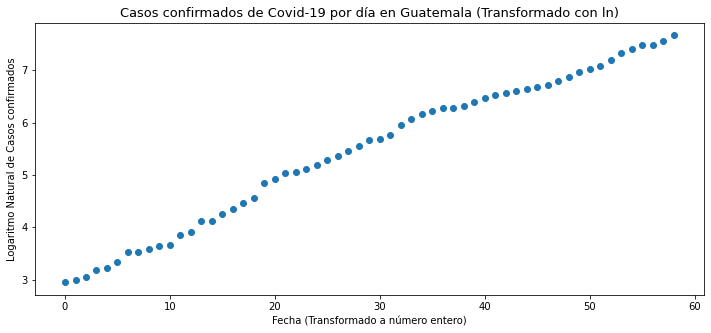

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(Confirmed),Int Date
16023,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439,0
16288,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732,1
16553,NaN,Guatemala,15.7835,-90.2308,2020-03-24,21,1,0,3.044522,2
16818,NaN,Guatemala,15.7835,-90.2308,2020-03-25,24,1,4,3.178054,3
17083,NaN,Guatemala,15.7835,-90.2308,2020-03-26,25,1,4,3.218876,4
17348,NaN,Guatemala,15.7835,-90.2308,2020-03-27,28,1,4,3.332205,5
17613,NaN,Guatemala,15.7835,-90.2308,2020-03-28,34,1,10,3.526361,6
17878,NaN,Guatemala,15.7835,-90.2308,2020-03-29,34,1,10,3.526361,7
18143,NaN,Guatemala,15.7835,-90.2308,2020-03-30,36,1,10,3.583519,8
18408,NaN,Guatemala,15.7835,-90.2308,2020-03-31,38,1,12,3.637586,9


In [7]:
GT_confirmed_post22["Int Date"] = (GT_confirmed_post22["Date"] - GT_confirmed_post22.iloc[0]["Date"]).dt.days

plt.figure(figsize=(12,5))
plt.scatter(x = GT_confirmed_post22["Int Date"], y= GT_confirmed_post22["ln(Confirmed)"])
plt.title("Casos confirmados de Covid-19 por día en Guatemala (Transformado con ln)", FontSize=13)
plt.xlabel("Fecha (Transformado a número entero)")
plt.ylabel("Logaritmo Natural de Casos confirmados")
plt.show()

GT_confirmed_post22.head(10)

### Definición del Modelo

Se definé una función para entrenar el modelo lineal. Se usará tensorboard para validar cual learning rate e iteraciones nos brindan un menor MSE.

In [8]:
def linear_regression(x, y , epochs, lr, grade, print_interval,logs_dir):
    tf.reset_default_graph()
    predicted_weights = None
    independent_vars_count = x.shape[1]+1
    with tf.name_scope("Pesos"):
        x = tf.concat([x,tf.ones([x.shape[0],1],tf.float64)], axis = 1)
        weights = tf.Variable(name="Weights", initial_value=tf.zeros((independent_vars_count,1),tf.float64))
    with tf.name_scope("Evaluar_Hipotesis"):
        y_hat = tf.matmul(x,weights)
    with tf.name_scope("Calcular_Error"):
        error = (0.5*tf.reduce_mean(tf.math.square(y - y_hat)))
    with tf.name_scope("Calcular_Gradientes"):
        gradients = tf.gradients(error ,weights)
    with tf.name_scope("Actualizar_Pesos"):
        update_weights = tf.assign(weights,(tf.add(weights,tf.scalar_mul(-lr,gradients[0]))))

    error_summary = tf.summary.scalar(name='Error_vs_Epochs', tensor=error)

    with tf.Session() as session:
        curr_datetime = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
        writer = tf.summary.FileWriter(logs_dir+curr_datetime+"_lr="+str(lr)+"_epochs="+str(epochs)+"_polinomio_grado="+str(grade),session.graph)
        session.run(tf.global_variables_initializer())
        for epoch in range(0,epochs):
            if ((epoch+1) % print_interval) == 0:
                print("epoch:"+str(epoch+1)+" error: "+str(session.run(error)))
      
            writer.add_summary(session.run(error_summary), epoch)
            session.run(update_weights)

        predicted_weights = session.run(weights)
        writer.close()
    session.close()
    
    return predicted_weights

Se procede al entrenamiento del modelo con los datos transformados.

In [9]:
x = np.array(GT_confirmed_post22["Int Date"], dtype=float).reshape(-1,1)
y = np.array(GT_confirmed_post22["ln(Confirmed)"]).reshape(-1,1)

weights = linear_regression(x=x,y=y, epochs=30000, lr=0.001, grade=1, print_interval=3000,  logs_dir="./covid19/")
print("\nPesos: m="+str(weights[0][0])+", b="+str(weights[1][0]))

epoch:3000 error: 0.2708759937278774
epoch:6000 error: 0.06805544051275587
epoch:9000 error: 0.024472138012776902
epoch:12000 error: 0.015106695375463204
epoch:15000 error: 0.013094192633320708
epoch:18000 error: 0.01266173391844971
epoch:21000 error: 0.01256880458416776
epoch:24000 error: 0.012548835368903692
epoch:27000 error: 0.012544544263610138
epoch:30000 error: 0.012543622165050094

Pesos: m=0.08243597663175642, b=3.0641343880006704


Después de varias pruebas, validamos que un learning rate de 0.001 y 30,000 iteraciones nos dan el mejor mse, arriba de 30,000 iteraciones, el cambio del error ya no es considerable.

<img alt="Error de entrenamiento" src="images/mse.png" />

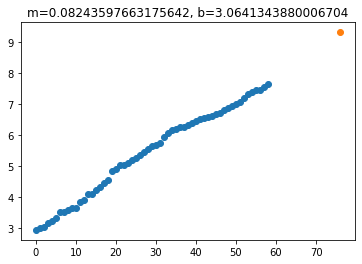

11262.890929258372

In [10]:
m = weights[0][0]
b = weights[1][0]


prediction_day = (datetime.datetime.strptime("2020-06-06","%Y-%m-%d") - GT_confirmed_post22.iloc[0]["Date"]).days
confirmed_transformed = m*prediction_day+b
plt.scatter(x,y)
plt.scatter(prediction_day,confirmed_transformed)
plt.title("m="+str(m)+", b="+str(b))
plt.show()

confirmed_cases = np.exp(confirmed_transformed)
confirmed_cases

### Conclusión

Según el modelo de regresión lineal, se predice que si la tendencía continua conforme los datos registrados, para el 6 de Junio del 2020 se obtendrían al rededor de 11,263 casos confirmados.

## Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [11]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [13]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Con una simple inspección de los datos, podemos decir que no existen datos categoricos ya que todos son representados numéricamente, por lo que queda validar si existen campos con valores nulos o NaN.

In [14]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Correlación de variables

Para la elección de las variables independientes, se realizará un análisis de correlación entre estas y la variable dependiente **quality**.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.1851,-0.174919,-0.057731,0.251397,0.476166,1.0


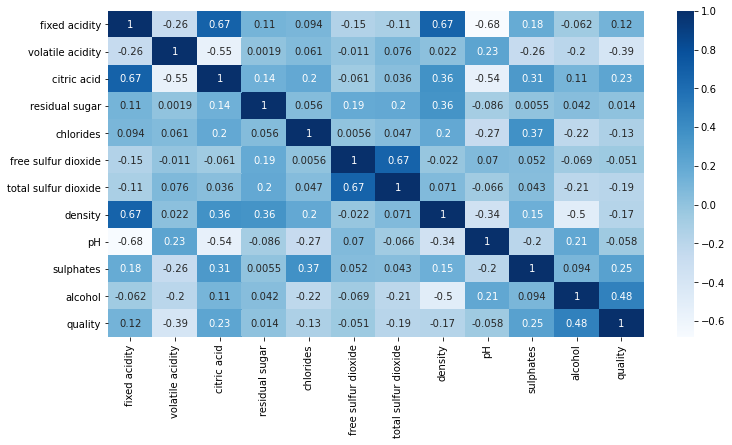

In [16]:
corr = data.corrwith(data["quality"])

plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap="Blues", annot=True)

corr.to_frame().T

Del análisis exploratorio realizado se puede observar que **alcohol** tiene una correlación alta positiva en relación a quality y que la variable **volatile acidity** cuenta una correlación negativa fuerte con la variable dependiente por lo cuál tomaremos estas variables como independientes.

Se aprovechará la reutilización de código, utilizando la función del ejercicio anterior para el entrenamiento del modelo.

In [17]:
volatile_acidity = data[["volatile acidity"]].to_numpy()
alcohol = data[["alcohol"]].to_numpy()
quality = data[["quality"]].to_numpy()

x = np.hstack((alcohol, volatile_acidity))
y = quality

weights = linear_regression(x=x,y=y, epochs=10000, lr=0.01, grade=1, print_interval=1000,  logs_dir="./winequality/")
weights

epoch:1000 error: 0.26103020342849026
epoch:2000 error: 0.25463518769005106
epoch:3000 error: 0.2496827497498139
epoch:4000 error: 0.2456665063061537
epoch:5000 error: 0.24232151650510708
epoch:6000 error: 0.23949475900130712
epoch:7000 error: 0.23708749045911579
epoch:8000 error: 0.23502923849085736
epoch:9000 error: 0.23326576742258526
epoch:10000 error: 0.23175325923729678


array([[ 0.43268498],
       [-0.94251422],
       [ 1.61240642]])

<img alt="Error de entrenamiento" src="images/wines1.png" />

Se procederá a realizar normalización de los valores de estas variables utilizando scaling prevío a entrenarlo en el modelo para confirmar si es posible obtener un mejor error.

In [18]:
def scale_var(var):
    return ((var-np.amin(var,axis=0))/(np.amax(var,axis=0)-np.amin(var,axis=0)))

In [19]:
x = scale_var(np.hstack((alcohol, volatile_acidity)))
y = scale_var(quality)

weights = linear_regression(x=x,y=y, epochs=10000, lr=0.01, grade=1, print_interval=1000,  logs_dir="./winequality/")
weights

epoch:1000 error: 0.011213227275829166
epoch:2000 error: 0.010400012067043425
epoch:3000 error: 0.00989408043163341
epoch:4000 error: 0.009573935289242188
epoch:5000 error: 0.00936740381945568
epoch:6000 error: 0.009231320074136606
epoch:7000 error: 0.009139641747628576
epoch:8000 error: 0.009076485655468869
epoch:9000 error: 0.00903203484982469
epoch:10000 error: 0.009000124674223883


array([[ 0.42085936],
       [-0.28818494],
       [ 0.47634896]])

<img alt="Error de entrenamiento" src="images/wines2.png" />

Como se puede observar, ha sido posible disminuir el error normalizando las variables previo al entrenamiento del modelo.

### Polinomio grado 2
Se procederá a utilizar la función PolynomialFeatures de sklearn para validar si con alguna transformación polinómica es posible mejorar el modelo.

In [20]:
poly_sq = PolynomialFeatures(degree=2)
data_sq = poly_sq.fit_transform(data[["alcohol","volatile acidity"]])

x = scale_var(data_sq[:,1:])
y = scale_var(quality)

weights = linear_regression(x=x,y=y, epochs=10000, lr=0.01, grade=2, print_interval=1000,  logs_dir="./winequality/")
weights

epoch:1000 error: 0.0106986423563663
epoch:2000 error: 0.009755903552346078
epoch:3000 error: 0.009327828385641456
epoch:4000 error: 0.009124299457152452
epoch:5000 error: 0.009023178920118672
epoch:6000 error: 0.008970959130348507
epoch:7000 error: 0.00894312852394707
epoch:8000 error: 0.008927931355397002
epoch:9000 error: 0.008919481285485326
epoch:10000 error: 0.008914719204677892


array([[ 0.249799  ],
       [-0.1484462 ],
       [ 0.2107431 ],
       [-0.13421191],
       [-0.13977166],
       [ 0.4870775 ]])

<img alt="Error de entrenamiento" src="images/wines3.png" />

Al agregar polinomios de grado 2 y posteriormente escalar las variables, se observa una leve mejora en el modelo, el error ha sido reducido de una manera no significante en comparación de entrenar únicamente las variables independientes.

### Polinomio grado 3

In [21]:
poly_cube = PolynomialFeatures(degree=3)
data_cube = poly_cube.fit_transform(data[["alcohol","volatile acidity"]])

x = scale_var(data_cube[:,1:])
y = scale_var(quality)

weights = linear_regression(x=x,y=y, epochs=10000, lr=0.01, grade=3, print_interval=1000,  logs_dir="./winequality/")
weights

epoch:1000 error: 0.010472991392665231
epoch:2000 error: 0.009474340424141926
epoch:3000 error: 0.009128131910064119
epoch:4000 error: 0.009002907040291363
epoch:5000 error: 0.008955910288459006
epoch:6000 error: 0.008937690760596164
epoch:7000 error: 0.00893039061169409
epoch:8000 error: 0.008927332754391722
epoch:9000 error: 0.00892595197265881
epoch:10000 error: 0.008925242811018629


array([[ 0.20265662],
       [-0.0867196 ],
       [ 0.16498114],
       [-0.08199247],
       [-0.09217488],
       [ 0.12972235],
       [-0.07965254],
       [-0.08834347],
       [-0.06986128],
       [ 0.48212737]])

<img alt="Error de entrenamiento" src="images/wines4.png" />

No se observó ninguna mejora al agregar polinomios de grado 3 al modelo, al contrario, el error tuvo un leve incremento que se podría considerar despreciable.

## Conclusión
- De las transformaciones realizadas durante la regresión poliniomial podemos concluír que agregar polinomios de grado 2 y 3 generados en base de las variables independientes ha representado una mejora muy pequeña en el error del modelo, sin embargo, la normalización y escalado de las variables previo al entrenamiento sí representó una disminución considerable del error.

<img alt="Error de entrenamiento" src="images/wines5.png" />
